In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import kn
from scipy.optimize import minimize
import galkin
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#10.3, 15.3, 7.7from the paper
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=230.# local circular velocity (km/s)
UsunINUSE=11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s)

In [4]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=0				# whether to use HI terminal velocities
flagFich89tab2=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=0				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=0			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=0				# whether to use the HI thickness method
flagHonmaSofue97=0				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=1				# whether to use CO terminal velocities
flagBurtonGordon78=0				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=0					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=1					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=0					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=0					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=0				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=0				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=0				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=0					# whether to use giant molecular clouds
flagHou09tabA2=0				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
##
flagOPENCLUSTERS=0				# whether to use open clusters
flagFrinchaboyMajewski08=0			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=0				# whether to use planetary nebulae
flagDurand98=0					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=1					# whether to use classical cepheids
flagPont94=1					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=0					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=0					# whether to use carbon stars
flagDemersBattinelli07=0			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=0				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
###
flagMASERS=0					# whether to use masers
flagReid14=0					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=0					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=0			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=0					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=0				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
##
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions

In [5]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [6]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  230.0  km/s
 (Usun,Vsun,Wsun) = ( 11.1 , 12.24 , 7.25 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            0
 use HI thickness method?               0
 use CO terminal velocities?            1
  use Burton & Gordon 78?                 0
  use Clemens 85?                         0
  use Knapp+ 85?                          1
  use Luna+ 06?                           0
 use HII regions?                       1
  use Blitz 79?                           0
  use Fich+ 89 (Table 1)?                 0
  use Turbide & Moffat 93?                0
  use Brand & Blitz 93?                   0
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            0
 use open clusters?                     0
 use planetary nebulae?                 0
 use cepheids?                          1
  use Pont+ 94?                           1
  use Pont+ 97?                     

In [7]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]

processing CO terminal velocities...
 processing Knapp+ 85...
  selected  37  CO terminal velocities
processing HII regions...
 processing Hou+ 09 (Table A1)...
  selected  316  out of the total sample of  815  HII regions
processing classical cepheids...
 processing Pont+ 94...
  selected  245  out of the total sample of  278  cepheids


In [8]:
vecRp    = np.array([row[0] for row in totallistvc])# galactocentric distance [kpc]
vecerrRp = np.array([row[1] for row in totallistvc])# error in galactocentric distance [kpc]
vecvRp   = np.array([row[2] for row in totallistvc])# rotation velocity [km/s]
vecerrvRp= np.array([row[3] for row in totallistvc])# error in rotation velocity [km/s]

Text(0,0.5,'$V_{c}(R)/km s^{-1}$')

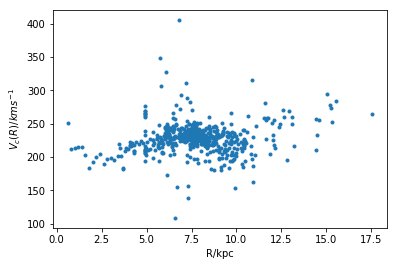

In [9]:
plt.plot(vecRp,vecvRp,'.')
plt.xlabel('R/kpc')
plt.ylabel(r'$V_{c}(R)/km s^{-1}$')

In [10]:
rho_soliton = 2.42e9#SM*kpc−3
m_axion = 2.44e-22#eV
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [11]:
R = np.linspace(0.1,20.,100)

In [12]:
def Vc2_b(R,rho_b,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    def I_b(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = R**2.*(R/a_b)**(-alpha_b)
        return (t*n)/d
    Rx = R.reshape(-1, 1)
    yp = np.linspace(0.,1.,100).reshape(1,-1)#integration limits
    dx = yp[0,1] - yp[0,0]
    fun = I_b(yp,Rx)
    res_int = integrate.simps(fun,dx=dx)
    return 4.*np.pi*G*q_b*rho_b*res_int

Text(0.5,1,'Bulge')

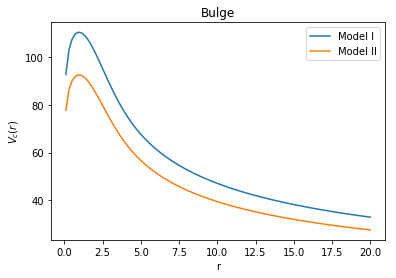

In [13]:
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_I)),label='Model I')
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_II)),label='Model II')
plt.xlabel('r')
plt.ylabel(r'$V_{c}(r)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Bulge')

In [14]:
Vc2_b_I = Vc2_b(vecRp,rho_b=rho_b_I)
Vc2_b_II = Vc2_b(vecRp,rho_b=rho_b_II)

In [15]:
def M_minor(r,rho_sol,m_a):
    rsol = ((rho_sol/2.42e9)*(m_a/1.0e-22)**2.)**(-0.25)
    n = 3465.*r**13.*rsol + 23100.*r**11.*rsol**3. + 65373.*r**9.*rsol**5. + 101376.*r**7.*rsol**7. + 92323.*r**5.*rsol**9. + 48580.*r**3.*rsol**11. + 3465.*(r**2.+rsol**2.)**7.*np.arctan(r/rsol) - 3465.*r*rsol**13.
    d = (r**2. +rsol**2.)**7.
    const = 4.*np.pi*rho_sol*rsol**3./215040.
    return const*n/d

In [16]:
def M_mayor(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/2.42e9)*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    delta_NFW = eps*r_eps*(r_s + r_eps)**2./r_s**3.
    t1 = np.log(r + r_s) + r_s/(r+r_s) -np.log(r_s +r_eps) - r_s/(r_s+r_eps)#- np.log(r_s) - 1.
    constant = 4.*np.pi*rho_sol*delta_NFW*r_s**3.
    n2 = 3465.*r_eps**13.*rsol + 23100.*r_eps**11.*rsol**3. + 65373.*r_eps**9.*rsol**5. + 101376.*r_eps**7.*rsol**7. + 92323.*r_eps**5.*rsol**9. + 48580.*r_eps**3.*rsol**11. + 3465.*(r_eps**2.+rsol**2.)**7.*np.arctan(r_eps/rsol) - 3465.*r_eps*rsol**13.
    d2 = (r_eps**2. +rsol**2.)**7.
    const2 = 4.*np.pi*rho_sol*rsol**3./215040.
    return constant*t1 + const2*n2/d2

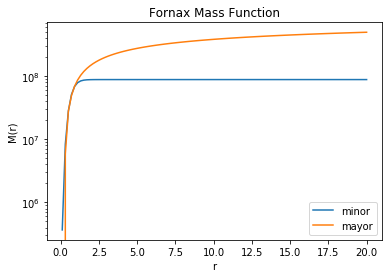

In [17]:
plt.plot(R,M_minor(R,rho_sol=0.037*rho_soliton,m_a=m_axion),label='minor')
plt.plot(R,M_mayor(R,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39),label='mayor')
plt.xlabel('r')
plt.ylabel('M(r)')
plt.yscale('log')
plt.title('Fornax Mass Function')
plt.legend(loc='lower right',prop={'size':10})

In [18]:
def vc2_DM_axion(r,rho_sol,m_a,eps,r_s):
    rsol = ((rho_sol/(2.42e9))*(m_a/1.0e-22)**2.)**(-0.25)
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    result = []
    for i in range(0,len(r)):
        if r[i]<r_eps:
            result.append(G*M_minor(r[i],rho_sol,m_a)/r[i])
        else:
            result.append(G*M_mayor(r[i],rho_sol,m_a,eps,r_s)/r[i])
    return np.array(result)

Text(0.5,1,'Dark Matter Axion Halo')

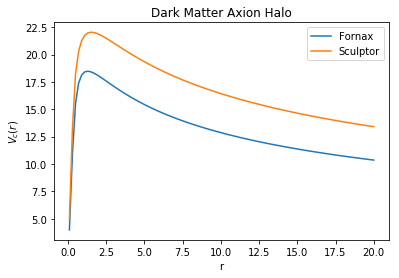

In [19]:
plt.plot(R,np.sqrt(vc2_DM_axion(R,rho_sol=0.037*rho_soliton,m_a=m_axion,eps=0.48,r_s=0.39)),label='Fornax')
plt.plot(R,np.sqrt(vc2_DM_axion(R,rho_sol=0.057*rho_soliton,m_a=m_axion,eps=0.464,r_s=0.57)),label='Sculptor')
plt.xlabel('r')
plt.ylabel(r'$V_{c}(r)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Dark Matter Axion Halo')

In [20]:
print ((0.037*rho_soliton/2.42e9)*(m_axion/1.0e-22)**2.)**(-0.25)

1.45966991119


In [21]:
def M_minor_v2(r,rho_sol,rsol,m_a):
    m_a = 1.0e-22*np.sqrt(2.42e9/(rho_sol*rsol**4.))
    n = 3465.*r**13.*rsol + 23100.*r**11.*rsol**3. + 65373.*r**9.*rsol**5. + 101376.*r**7.*rsol**7. + 92323.*r**5.*rsol**9. + 48580.*r**3.*rsol**11. + 3465.*(r**2.+rsol**2.)**7.*np.arctan(r/rsol) - 3465.*r*rsol**13.
    d = (r**2. +rsol**2.)**7.
    const = 4.*np.pi*rho_sol*rsol**3./215040.
    return const*n/d
def M_mayor_v2(r,rho_sol,rsol,eps,r_s,m_a):
    m_a = 1.0e-22*np.sqrt(2.42e9/(rho_sol*rsol**4.))
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    delta_NFW = eps*r_eps*(r_s + r_eps)**2./r_s**3.
    t1 = np.log(r + r_s) + r_s/(r+r_s) -np.log(r_s +r_eps) - r_s/(r_s+r_eps)#- np.log(r_s) - 1.
    constant = 4.*np.pi*rho_sol*delta_NFW*r_s**3.
    n2 = 3465.*r_eps**13.*rsol + 23100.*r_eps**11.*rsol**3. + 65373.*r_eps**9.*rsol**5. + 101376.*r_eps**7.*rsol**7. + 92323.*r_eps**5.*rsol**9. + 48580.*r_eps**3.*rsol**11. + 3465.*(r_eps**2.+rsol**2.)**7.*np.arctan(r_eps/rsol) - 3465.*r_eps*rsol**13.
    d2 = (r_eps**2. +rsol**2.)**7.
    const2 = 4.*np.pi*rho_sol*rsol**3./215040.
    return constant*t1 + const2*n2/d2

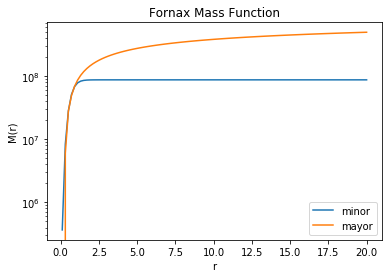

In [22]:
plt.plot(R,M_minor_v2(R,rho_sol=0.037*rho_soliton,rsol=1.45,m_a=m_axion),label='minor')
plt.plot(R,M_mayor_v2(R,rho_sol=0.037*rho_soliton,rsol=1.45,eps=0.48,r_s=0.39,m_a=m_axion),label='mayor')
plt.xlabel('r')
plt.ylabel('M(r)')
plt.yscale('log')
plt.title('Fornax Mass Function')
plt.legend(loc='lower right',prop={'size':10})

In [23]:
def vc2_DM_axion_v2(r,rho_sol,rsol,eps,r_s,m_a):
    m_a = 1.0e-22*np.sqrt(2.42e9/(rho_sol*rsol**4.))
    r_eps = rsol*np.sqrt(eps**(-1./8.) - 1.)
    result = []
    for i in range(0,len(r)):
        if r[i]<r_eps:
            result.append(G*M_minor_v2(r[i],rho_sol,rsol,m_a)/r[i])
        else:
            result.append(G*M_mayor_v2(r[i],rho_sol,rsol,eps,r_s,m_a)/r[i])
    return np.array(result)

Text(0.5,1,'Dark Matter Axion Halo')

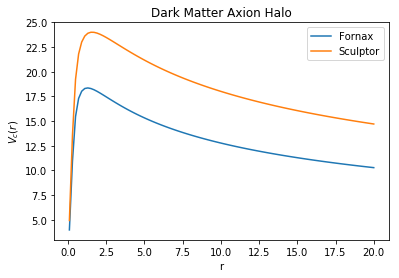

In [24]:
plt.plot(R,np.sqrt(vc2_DM_axion_v2(R,rho_sol=0.037*rho_soliton,rsol=1.45,eps=0.48,r_s=0.39,m_a=m_axion)),label='Fornax')
plt.plot(R,np.sqrt(vc2_DM_axion_v2(R,rho_sol=0.057*rho_soliton,rsol=1.45,eps=0.464,r_s=0.57,m_a=m_axion)),label='Sculptor')
plt.xlabel('r')
plt.ylabel(r'$V_{c}(r)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Dark Matter Axion Halo')

In [26]:
def Vc2_SD_simps(R,R_d,Sigma_d_SD,z=0.,alpha_0=0.5,z1=1.,z0=0.3):
    def I_SD(zp,a,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/R_d)*t2*t1/d
        f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
        return R*f*g
    Integral_SD_sims = []
    a_lims = np.linspace(0.1, 20.0,2*len(R))#200
    zp_lims = np.linspace(-20.0,20.0,4*len(R))#400
    fun_zp = np.zeros(len(zp_lims))
    for k in range(0,len(R)):
        for i in range(0,len(zp_lims)):
            fun_zp[i] = integrate.simps(I_SD(zp_lims[i],a_lims,R[k]),a_lims)
        result = integrate.simps(fun_zp,zp_lims)
        Integral_SD_sims.append(result)
    return -4.*G*Sigma_d_SD*np.array(Integral_SD_sims)/R_d

Text(0.5,1,'Stelar Disk')

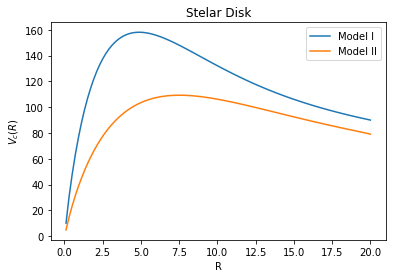

In [27]:
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I)),label='Model I')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II)),label='Model II')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Stelar Disk')

In [28]:
Vc2_SD_I = Vc2_SD_simps(vecRp,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I)
Vc2_SD_II = Vc2_SD_simps(vecRp,R_d=R_d_II,Sigma_d_SD=Sigma_d_SD_II)

In [29]:
def Vc2_ISM_ap(R,R_d,Sigma_g_ISM,R_m=R_m):
    def M_g_ISM(u,R):
        return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return 2.*np.pi*Sigma_g_ISM*G*np.array(Integral_M_g)

Text(0.5,1,'Interestelar Medium')

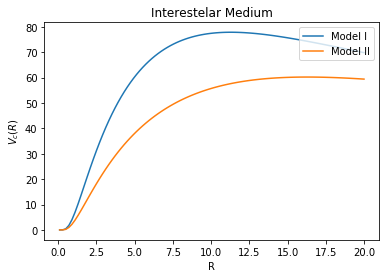

In [30]:
plt.plot(R,np.sqrt(Vc2_ISM_ap(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I)),label='Model I')
plt.plot(R,np.sqrt(Vc2_ISM_ap(R,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II)),label='Model II')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.title('Interestelar Medium')

In [31]:
Vc2_ISM_ap_I = Vc2_ISM_ap(vecRp,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I)
Vc2_ISM_ap_II = Vc2_ISM_ap(vecRp,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II)

# Ajuste de $\rho_{sol}$

In [41]:
def Vc_tot_rho_sol_I(R,params,parameters):
    rho_sol = params
    eps,r_s,m_a = parameters
    suma = Vc2_b_I + vc2_DM_axion(R,rho_sol,m_a,eps,r_s) + Vc2_SD_I + Vc2_ISM_ap_I
    return np.sqrt(suma)

In [42]:
par_wo_rho_sol_I = np.array([0.4,0.3,m_axion])
par_wo_rho_sol_II = np.array([0.4,0.3,m_axion])

In [43]:
print ((rho_soliton/(2.42e9))*(m_axion/1.0e-22)**2.)**(-0.25)

0.640184399664


In [44]:
rsol_array = np.linspace(0.1,2.0,20)
print rsol_array

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ]


In [45]:
rhosol_array = rho_soliton/((1.0e-22/m_axion)**2.*rsol_array**4.)
print rhosol_array

[1.44077120e+14 9.00482000e+12 1.77872988e+12 5.62801250e+11
 2.30523392e+11 1.11170617e+11 6.00071304e+10 3.51750781e+10
 2.19596281e+10 1.44077120e+10 9.84066116e+09 6.94816358e+09
 5.04454046e+09 3.75044565e+09 2.84596780e+09 2.19844238e+09
 1.72504065e+09 1.37247676e+09 1.10555567e+09 9.00482000e+08]


In [46]:
def Xi2_rho_sol_I(parameters):
    rho_sol = parameters
    par = np.exp(rho_sol)
    model = Vc_tot_rho_sol_I(vecRp,par,par_wo_rho_sol_I)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [47]:
x0_rho_sol_I = np.array(np.log(1.0e8))

In [48]:
LS_rho_sol_I = minimize(Xi2_rho_sol_I,x0_rho_sol_I,method='L-BFGS-B',bounds=((np.log(1.0e9),np.log(9.0e12)),))

In [49]:
print LS_rho_sol_I

      fun: 2483059.142108562
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.13969839])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 5
   status: 0
  success: True
        x: array([26.68452912])


In [52]:
print LS_rho_sol_I

      fun: 2483059.142108562
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.13969839])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 24
      nit: 5
   status: 0
  success: True
        x: array([26.68452912])


In [53]:
print np.exp(LS_rho_sol_I.x)

[3.88100096e+11]


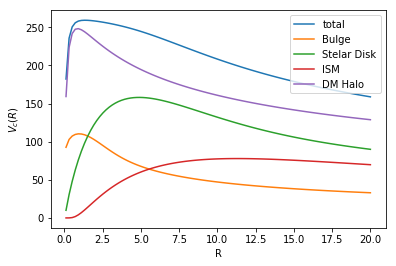

In [65]:
plt.plot(R,Vc_tot_rho_sol(R,np.exp(26.68452912),par_wo_rho_sol_I), label='total')
plt.plot(R,np.sqrt(Vc2_b(R,rho_b=rho_b_I)),label='Bulge')
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I)),label='Stelar Disk')
plt.plot(R,np.sqrt(Vc2_ISM_ap(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I)),label='ISM')
plt.plot(R,np.sqrt(vc2_DM_axion(R,rho_sol=np.exp(26.68452912),m_a=m_axion,eps=0.48,r_s=0.39)),label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})

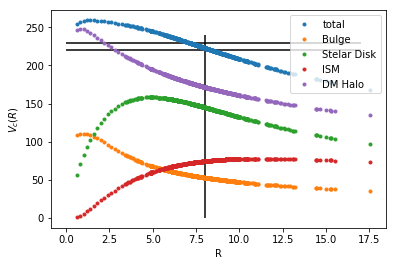

In [76]:
plt.plot(vecRp,Vc_tot_rho_sol_I(vecRp,np.asscalar(np.exp(LS_rho_sol_I.x)),par_wo_rho_sol_I),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_I),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_I),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_I.x)),m_a=m_axion,eps=0.48,r_s=0.39)),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

In [62]:
def Vc_tot_rho_sol_II(r,params,parameters):
    rho_sol = params
    eps,r_s,m_a = parameters
    suma = Vc2_b_II + vc2_DM_axion(r,rho_sol,m_a,eps,r_s) + Vc2_SD_II + Vc2_ISM_ap_II
    return np.sqrt(suma)

In [63]:
def Xi2_rho_sol_II(parameters):
    rho_sol = parameters
    par = np.exp(rho_sol)
    model = Vc_tot_rho_sol_II(vecRp,par,par_wo_rho_sol_II)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [64]:
x0_rho_sol_II = np.array(np.log(1.0e8))

In [65]:
LS_rho_sol_II = minimize(Xi2_rho_sol_II,x0_rho_sol_II,method='L-BFGS-B',bounds=((np.log(1.0e9),np.log(9.0e12)),))

In [66]:
print LS_rho_sol_II

      fun: 3774279.4654574106
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.60535967])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 26
      nit: 6
   status: 0
  success: True
        x: array([27.42574813])


In [67]:
print np.exp(LS_rho_sol_II.x)

[8.14424963e+11]


In [68]:
np.asscalar(np.exp(LS_rho_sol_II.x))

814424962994.7181

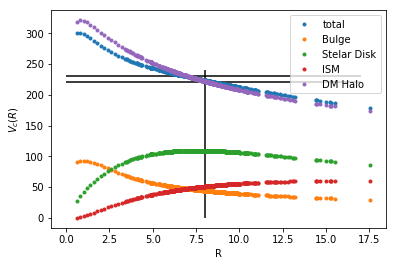

In [77]:
plt.plot(vecRp,Vc_tot_rho_sol_II(vecRp,np.asscalar(np.exp(LS_rho_sol_II.x)),par_wo_rho_sol_II),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_II),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_II),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_II),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_II.x)),m_a=m_axion,eps=0.48,r_s=0.39)),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

# Ajuste de $m_{a}$

In [196]:
def Vc_tot_m_a_I(r,params,parameters):
    m_a = params
    eps,r_s,rho_sol = parameters
    suma = Vc2_b_I + vc2_DM_axion(r,rho_sol,m_a,eps,r_s) + Vc2_SD_I + Vc2_ISM_ap_I
    return np.sqrt(suma)

In [205]:
pars_wo_m_a_I = np.array([0.4,0.3,0.037*rho_soliton])

In [206]:
def Xi2_m_a_I(parameters):
    m_a = parameters
    par = np.exp(m_a)
    model = Vc_tot_m_a_I(vecRp,par,pars_wo_m_a_I)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [207]:
x0_m_a_I = np.array(np.log(1.0e-24))

In [208]:
LS_m_a_I = minimize(Xi2_m_a_I,x0_m_a_I,method='L-BFGS-B',bounds=((np.log(1.0e-24),np.log(1.0e-20)),))

In [209]:
print LS_m_a_I

      fun: 2041491.3591039532
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.04656613])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 4
   status: 0
  success: True
        x: array([-54.07207757])


In [210]:
print np.exp(LS_m_a_I.x)

[3.28696506e-24]


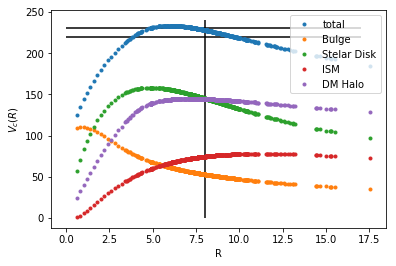

In [211]:
plt.plot(vecRp,Vc_tot_m_a_I(vecRp,np.asscalar(np.exp(LS_m_a_I.x)),pars_wo_m_a_I),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_I),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_I),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=0.037*rho_soliton,m_a=np.asscalar(np.exp(LS_m_a_I.x)),eps=0.48,r_s=0.39)),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

# Ajustando $\rho_{sol}$ y $m_{a}$

In [83]:
def Vc_tot_rho_sol_m_a_I(r,params,parameters):
    rho_sol,m_a = params
    eps,r_s = parameters
    suma = Vc2_b_I + vc2_DM_axion(r,rho_sol,m_a,eps,r_s) + Vc2_SD_I + Vc2_ISM_ap_I
    return np.sqrt(suma)

In [84]:
par_wo_rho_sol_m_a_I = np.array([0.4,0.3])
par_wo_rho_sol_m_a_II = np.array([0.4,0.3])

In [85]:
def Xi2_rho_sol_m_a_I(parameters):
    rho_sol,m_a = parameters
    par = np.exp(rho_sol),np.exp(m_a)
    model = Vc_tot_rho_sol_m_a_I(vecRp,par,par_wo_rho_sol_m_a_I)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [109]:
print 1.0e-22*np.sqrt(2.42e9/(rho_soliton*rsol_array**4.))

[1.00000000e-20 2.50000000e-21 1.11111111e-21 6.25000000e-22
 4.00000000e-22 2.77777778e-22 2.04081633e-22 1.56250000e-22
 1.23456790e-22 1.00000000e-22 8.26446281e-23 6.94444444e-23
 5.91715976e-23 5.10204082e-23 4.44444444e-23 3.90625000e-23
 3.46020761e-23 3.08641975e-23 2.77008310e-23 2.50000000e-23]


In [120]:
x0_rho_sol_m_a_I = np.array([np.log(1.0e8),np.log(1.0e-25)])

In [121]:
LS_rho_sol_m_a_I = minimize(Xi2_rho_sol_m_a_I,x0_rho_sol_m_a_I,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(9.0e13)),(np.log(1.0e-25),np.log(1.0e-20)),))

In [122]:
LS_rho_sol_m_a_I

      fun: 2914.118944728387
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00068212,  0.00181899])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 75
      nit: 12
   status: 0
  success: True
        x: array([ 19.63326443, -53.92732627])

In [123]:
pars_rho_sol_m_a_I_min = np.array([np.exp(LS_rho_sol_m_a_I.x[0]),np.exp(LS_rho_sol_m_a_I.x[1])])
print pars_rho_sol_m_a_I_min

[3.36216019e+08 3.79891677e-24]


In [194]:
((3.36216019e+08/(2.42e9))*(3.79891677e-24/1.0e-22)**2.)**(-0.25)

8.403677000537964

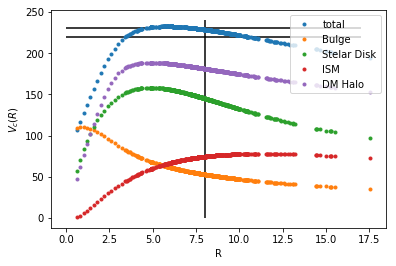

In [125]:
plt.plot(vecRp,Vc_tot_rho_sol_m_a_I(vecRp,pars_rho_sol_m_a_I_min,par_wo_rho_sol_m_a_I),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_I),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_I),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_m_a_I.x[0])),m_a=np.asscalar(np.exp(LS_rho_sol_m_a_I.x[1])),eps=0.48,r_s=0.39)),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

In [126]:
def Vc_tot_rho_sol_m_a_II(r,params,parameters):
    rho_sol,m_a = params
    eps,r_s = parameters
    suma = Vc2_b_II + vc2_DM_axion(r,rho_sol,m_a,eps,r_s) + Vc2_SD_II + Vc2_ISM_ap_II
    return np.sqrt(suma)

In [127]:
def Xi2_rho_sol_m_a_II(parameters):
    rho_sol,m_a = parameters
    par = np.exp(rho_sol),np.exp(m_a)
    model = Vc_tot_rho_sol_m_a_II(vecRp,par,par_wo_rho_sol_m_a_II)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [128]:
x0_rho_sol_m_a_II = np.array([np.log(1.0e8),np.log(1.0e-25)])

In [129]:
LS_rho_sol_m_a_II = minimize(Xi2_rho_sol_m_a_II,x0_rho_sol_m_a_II,method='L-BFGS-B',bounds=((np.log(1.0e8),np.log(9.0e13)),(np.log(1.0e-25),np.log(1.0e-20)),))

In [130]:
LS_rho_sol_m_a_II

      fun: 2914.118944728387
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00068212,  0.00181899])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 75
      nit: 12
   status: 0
  success: True
        x: array([ 19.63326443, -53.92732627])

In [133]:
pars_rho_sol_m_a_II_min = np.array([np.exp(LS_rho_sol_m_a_II.x[0]),np.exp(LS_rho_sol_m_a_II.x[1])])
print pars_rho_sol_m_a_II_min

[3.36216019e+08 3.79891677e-24]


In [195]:
((3.36216019e+08/(2.42e9))*(3.79891677e-24/1.0e-22)**2.)**(-0.25)

8.403677000537964

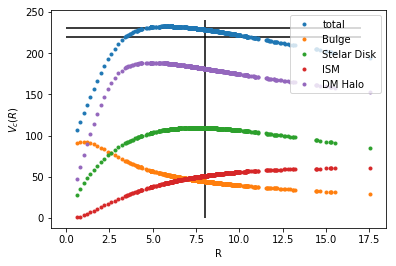

In [147]:
plt.plot(vecRp,Vc_tot_rho_sol_m_a_II(vecRp,pars_rho_sol_m_a_II_min,par_wo_rho_sol_m_a_II),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_II),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_II),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_II),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_m_a_II.x[0])),m_a=np.asscalar(np.exp(LS_rho_sol_m_a_II.x[1])),eps=0.48,r_s=0.39)),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

# Ahora ajustaremos $\rho_{sol}$ y $r_{sol}$

In [135]:
def Vc_tot_rho_sol_rsol_I(r,params,parameters):
    rho_sol,rsol = params
    eps,r_s,m_a = parameters
    suma = Vc2_b_I + vc2_DM_axion_v2(r,rho_sol,rsol,eps,r_s,m_a) + Vc2_SD_I + Vc2_ISM_ap_I
    return np.sqrt(suma)

In [136]:
par_wo_rho_sol_rsol_I=np.array([0.4,0.3,m_axion])
par_wo_rho_sol_rsol_II=np.array([0.4,0.3,m_axion])

In [137]:
def Xi2_rho_sol_rsol_I(parameters):
    rho_sol,rsol = parameters
    par = np.exp(rho_sol),rsol
    model = Vc_tot_rho_sol_rsol_I(vecRp,par,par_wo_rho_sol_rsol_I)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [184]:
x0_rho_sol_rsol_I = np.array([np.log(1.0e7),0.00001])

In [189]:
LS_rho_sol_rsol_I = minimize(Xi2_rho_sol_rsol_I,x0_rho_sol_rsol_I,method='L-BFGS-B',bounds=((np.log(1.0e7),np.log(9.0e13)),(0.00001,3.),))

In [190]:
print LS_rho_sol_rsol_I

      fun: 2563.656696229539
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.       , 0.0001819])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 84
      nit: 13
   status: 0
  success: True
        x: array([18.09289617,  2.65510089])


In [191]:
pars_rho_sol_rsol_I_min = np.array([np.exp(LS_rho_sol_rsol_I.x[0]),LS_rho_sol_rsol_I.x[1]])
print pars_rho_sol_rsol_I_min

[7.20518219e+07 2.65510089e+00]


In [192]:
1.0e-22*np.sqrt(2.42e9/(np.asscalar(np.exp(LS_rho_sol_rsol_I.x[0]))*np.asscalar(LS_rho_sol_rsol_I.x[1])**4.))

8.220971474154126e-23

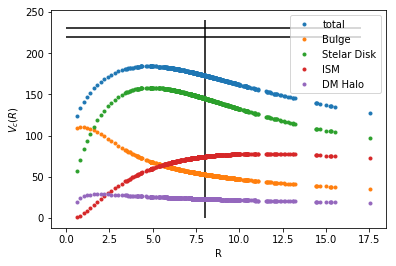

In [188]:
plt.plot(vecRp,Vc_tot_rho_sol_rsol_I(vecRp,pars_rho_sol_rsol_I_min,par_wo_rho_sol_rsol_I),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_I),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_I),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion_v2(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_rsol_I.x[0])),rsol=np.asscalar(LS_rho_sol_rsol_I.x[1]),eps=0.48,r_s=0.39,m_a=m_axion)),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

In [166]:
def Vc_tot_rho_sol_rsol_II(r,params,parameters):
    rho_sol,rsol = params
    eps,r_s,m_a = parameters
    suma = Vc2_b_II + vc2_DM_axion_v2(r,rho_sol,rsol,eps,r_s,m_a) + Vc2_SD_II + Vc2_ISM_ap_II
    return np.sqrt(suma)

In [167]:
def Xi2_rho_sol_rsol_II(parameters):
    rho_sol,rsol = parameters
    par = np.exp(rho_sol),rsol
    model = Vc_tot_rho_sol_rsol_II(vecRp,par,par_wo_rho_sol_rsol_II)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [171]:
x0_rho_sol_rsol_II = np.array([np.log(1.0e7),0.000001])

In [180]:
LS_rho_sol_rsol_II = minimize(Xi2_rho_sol_rsol_II,x0_rho_sol_rsol_II,method='L-BFGS-B',bounds=((np.log(1.0e7),np.log(9.0e13)),(0.000001,15.0),))

In [181]:
LS_rho_sol_rsol_II

      fun: 2914.1189447296006
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.27595761e-04,  9.09494702e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 93
      nit: 23
   status: 0
  success: True
        x: array([19.63326347,  8.40368072])

In [182]:
pars_rho_sol_rsol_II_min = np.array([np.exp(LS_rho_sol_rsol_II.x[0]),LS_rho_sol_rsol_II.x[1]])
print pars_rho_sol_rsol_II_min

[3.36215699e+08 8.40368072e+00]


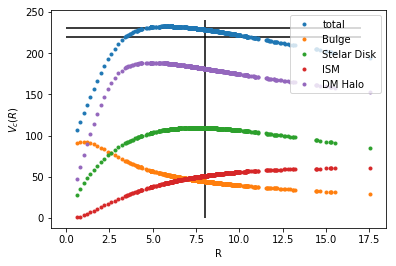

In [183]:
plt.plot(vecRp,Vc_tot_rho_sol_rsol_II(vecRp,pars_rho_sol_rsol_II_min,par_wo_rho_sol_rsol_II),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_II),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_II),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_II),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion_v2(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_rsol_II.x[0])),rsol=np.asscalar(LS_rho_sol_rsol_II.x[1]),eps=0.48,r_s=0.39,m_a=m_axion)),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

In [193]:
1.0e-22*np.sqrt(2.42e9/(np.asscalar(np.exp(LS_rho_sol_rsol_II.x[0]))*np.asscalar(LS_rho_sol_rsol_II.x[1])**4.))

3.798915215409042e-24

# Ajuste $\rho_{sol}$, $r_{sol}$, $\epsilon$ y $r_{s}$

In [1]:
def Vc_tot_rho_sol_rsol_r_s_epsI(r,params,parameters):
    rho_sol,rsol,eps,r_s = params
    m_a = parameters
    suma = Vc2_b_I + vc2_DM_axion_v2(r,rho_sol,rsol,eps,r_s,m_a) + Vc2_SD_I + Vc2_ISM_ap_I
    return np.sqrt(suma)

In [32]:
def Xi2_rho_sol_rsol_r_s_epsI(parameters):
    rho_sol,rsol,eps,r_s = parameters
    par = np.exp(rho_sol),rsol,eps,r_s
    model = Vc_tot_rho_sol_rsol_r_s_epsI(vecRp,par,m_axion)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [57]:
x0_rho_sol_rsol_r_s_epsI = np.array([np.log(1.0e9),0.01,0.01,0.01])

In [62]:
LS_rho_sol_rsol_r_s_epsI = minimize(Xi2_rho_sol_rsol_r_s_epsI,x0_rho_sol_rsol_r_s_epsI,method='L-BFGS-B',bounds=((np.log(1.0e9),np.log(9.0e13)),(0.01,15.0),(0.01,15.0),(0.01,15.0),))

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


In [63]:
print LS_rho_sol_rsol_r_s_epsI

      fun: nan
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([  36.85004231,   17.59763109, -843.28053163,    4.29890861])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 1025
      nit: 93
   status: 2
  success: False
        x: array([21.48772711,  2.26906657,  0.97706612,  8.62352608])


In [64]:
pars_rho_sol_rsol_r_s_epsI_min = np.array([np.exp(LS_rho_sol_rsol_r_s_epsI.x[0]),LS_rho_sol_rsol_r_s_epsI.x[1],LS_rho_sol_rsol_r_s_epsI.x[2],LS_rho_sol_rsol_r_s_epsI.x[3]])
print pars_rho_sol_rsol_r_s_epsI_min

[2.14783696e+09 2.26906657e+00 9.77066116e-01 8.62352608e+00]


In [219]:
1.0e-22*np.sqrt(2.42e9/(np.asscalar(np.exp(LS_rho_sol_rsol_r_s_epsI.x[0]))*np.asscalar(LS_rho_sol_rsol_r_s_epsI.x[1])**4.))

2.0616386661332623e-23

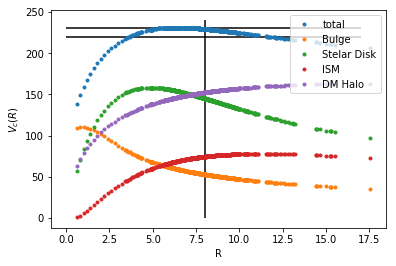

In [65]:
plt.plot(vecRp,Vc_tot_rho_sol_rsol_r_s_epsI(vecRp,pars_rho_sol_rsol_r_s_epsI_min,m_axion),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_I),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_I),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion_v2(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_rsol_r_s_epsI.x[0])),rsol=np.asscalar(LS_rho_sol_rsol_r_s_epsI.x[1]),eps=np.asscalar(LS_rho_sol_rsol_r_s_epsI.x[2]),r_s=np.asscalar(LS_rho_sol_rsol_r_s_epsI.x[3]),m_a=m_axion)),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

In [217]:
def Vc_tot_rho_sol_rsol_r_s_epsII(r,params,parameters):
    rho_sol,rsol,eps,r_s = params
    m_a = parameters
    suma = Vc2_b_II + Vc2_SD_II + Vc2_ISM_ap_II + vc2_DM_axion_v2(r,rho_sol,rsol,eps,r_s,m_a)
    return np.sqrt(suma)

In [67]:
def Xi2_rho_sol_rsol_r_s_epsII(parameters):
    rho_sol,rsol,eps,r_s = parameters
    par = np.exp(rho_sol),rsol,eps,r_s
    model = Vc_tot_rho_sol_rsol_r_s_epsII(vecRp,par,m_axion)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [196]:
x0_rho_sol_rsol_r_s_epsII = np.array([np.log(1.0e7),0.01,0.01,0.01])

In [197]:
LS_rho_sol_rsol_r_s_epsII = minimize(Xi2_rho_sol_rsol_r_s_epsII,x0_rho_sol_rsol_r_s_epsII,method='L-BFGS-B',bounds=((np.log(1.0e7),np.log(9.0e13)),(0.01,15.0),(0.01,5.0),(0.01,5.0),))

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


In [198]:
print LS_rho_sol_rsol_r_s_epsII

      fun: nan
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.02910383, -1.09139364, -0.56752469, -0.51804818])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 110
      nit: 1
   status: 2
  success: False
        x: array([16.11809565,  0.05365575,  0.02455192,  0.0274623 ])


In [199]:
pars_rho_sol_rsol_r_s_epsII_min = np.array([np.exp(LS_rho_sol_rsol_r_s_epsII.x[0]),LS_rho_sol_rsol_r_s_epsII.x[1],LS_rho_sol_rsol_r_s_epsII.x[2],LS_rho_sol_rsol_r_s_epsII.x[3]])
print pars_rho_sol_rsol_r_s_epsII_min

[1.00000000e+07 5.36557457e-02 2.45519152e-02 2.74622983e-02]


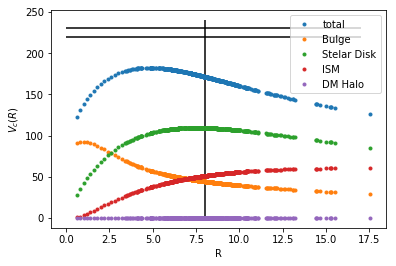

In [218]:
plt.plot(vecRp,Vc_tot_rho_sol_rsol_r_s_epsI(vecRp,pars_rho_sol_rsol_r_s_epsII_min,m_axion),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_II),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_II),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_II),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion_v2(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_rsol_r_s_epsII.x[0])),rsol=np.asscalar(LS_rho_sol_rsol_r_s_epsII.x[1]),eps=np.asscalar(LS_rho_sol_rsol_r_s_epsII.x[2]),r_s=np.asscalar(LS_rho_sol_rsol_r_s_epsII.x[3]),m_a=m_axion)),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

# Ajuste de $\rho_{sol}$, $m_{a}$, $\epsilon$ y $r_{s}$

In [367]:
def Vc_tot_rho_sol_m_a_eps_r_s_I(r,params):
    rho_sol,m_a,eps,r_s = params
    suma = Vc2_b_I + vc2_DM_axion(r,rho_sol,m_a,eps,r_s) + Vc2_SD_I + Vc2_ISM_ap_I
    return np.sqrt(suma)

In [368]:
def Xi2_rho_sol_m_a_r_s_epsI(parameters):
    rho_sol,m_a,eps,r_s = parameters
    par = np.exp(rho_sol),np.exp(m_a),eps,r_s
    model = Vc_tot_rho_sol_m_a_eps_r_s_I(vecRp,par)
    xi = np.sum((vecvRp-model)**2./(vecerrvRp)**2.)
    return xi

In [413]:
x0_rho_sol_m_a_r_s_epsI = np.array([np.log(1.0e7),np.log(1.0e-23),0.00001,0.00001])

In [414]:
LS_rho_sol_m_a_r_s_epsI = minimize(Xi2_rho_sol_m_a_r_s_epsI,x0_rho_sol_m_a_r_s_epsI,method='L-BFGS-B',bounds=((np.log(1.0e7),np.log(9.0e11)),(np.log(1.0e-23),np.log(1.0e-20)),(0.00001,25.0),(0.00001,25.0),))

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [415]:
print LS_rho_sol_m_a_r_s_epsI

      fun: 2375.7835284515168
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.54205884, -0.02883098, -1.74495653,  1.01567821])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1220
      nit: 159
   status: 0
  success: True
        x: array([ 22.11777184, -52.95655855,   0.9956012 ,   8.5124746 ])


In [416]:
pars_rho_sol_m_a_r_s_epsI_min = np.array([np.exp(LS_rho_sol_m_a_r_s_epsI.x[0]),np.exp(LS_rho_sol_m_a_r_s_epsI.x[1]),LS_rho_sol_m_a_r_s_epsI.x[2],LS_rho_sol_m_a_r_s_epsI.x[3]])
print pars_rho_sol_m_a_r_s_epsI_min

[4.03298179e+09 1.00290279e-23 9.95601201e-01 8.51247460e+00]


In [381]:
((6.02322067e+08/(2.42e9))*(1.00000598e-23/1.0e-22)**2.)**(-0.25)

4.4770850983629735

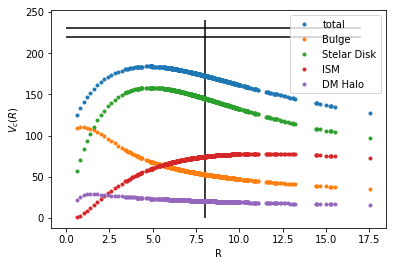

In [351]:
plt.plot(vecRp,Vc_tot_rho_sol_m_a_eps_r_s_I(vecRp,pars_rho_sol_m_a_r_s_epsI_min),'.', label='total')
plt.plot(vecRp,np.sqrt(Vc2_b_I),'.',label='Bulge')
plt.plot(vecRp,np.sqrt(Vc2_SD_I),'.',label='Stelar Disk')
plt.plot(vecRp,np.sqrt(Vc2_ISM_ap_I),'.',label='ISM')
plt.plot(vecRp,np.sqrt(vc2_DM_axion(vecRp,rho_sol=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsI.x[0])),m_a=np.asscalar(np.exp(LS_rho_sol_m_a_r_s_epsI.x[1])),eps=np.asscalar(LS_rho_sol_m_a_r_s_epsI.x[2]),r_s=np.asscalar(LS_rho_sol_m_a_r_s_epsI.x[3]))),'.',label='DM Halo')
plt.xlabel('R')
plt.ylabel(r'$V_{c}(R)$')
plt.legend(loc='upper right', prop={'size':10})
plt.hlines(220,0,17)
plt.hlines(230,0,17)
plt.vlines(8,0,240)

In [308]:
x0_rho_sol_m_a_r_s_epsI_v2 = np.array([np.log(1.0e4),np.log(1.0e-22),0.1,0.1])

In [309]:
LS_rho_sol_m_a_r_s_epsI_v2 = minimize(Xi2_rho_sol_m_a_r_s_epsI,x0_rho_sol_m_a_r_s_epsI_v2,method='L-BFGS-B',bounds=((np.log(1.0e4),np.log(9.0e12)),(np.log(1.0e-22),np.log(1.0e-20)),(0.1,5.0),(0.1,5.0),))

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [310]:
print LS_rho_sol_m_a_r_s_epsI_v2

      fun: nan
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -6221.2492594 ,  13039.29457208, -12970.7652377 , -88929.52773749])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 135
      nit: 1
   status: 2
  success: False
        x: array([ 26.99934312, -50.65687205,   0.22429751,   0.10125553])


In [311]:
pars_rho_sol_m_a_r_s_epsI_min_v2 = np.array([np.exp(LS_rho_sol_m_a_r_s_epsI_v2.x[0]),np.exp(LS_rho_sol_m_a_r_s_epsI_v2.x[1]),LS_rho_sol_m_a_r_s_epsI_v2.x[2],LS_rho_sol_m_a_r_s_epsI_v2.x[3]])
print pars_rho_sol_m_a_r_s_epsI_min_v2

[5.31698866e+11 1.00000000e-22 2.24297505e-01 1.01255530e-01]
